In [ ]:
import os
HOME = os.getcwd()
print(HOME)

from roboflow import Roboflow
from IPython.display import Image
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="")

project = rf.workspace("qtiee").project("football-players-detection-3zvbc-9soce")
version = project.version(7)
dataset = version.download("yolo26")
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

/workspace
mkdir: cannot create directory ‘/workspace/datasets’: File exists
/workspace/datasets


loading Roboflow workspace...
loading Roboflow project...


## Custom training

In [ ]:
MODEL_NAME="yolo26m.pt"
EPOCHS=50
BATCH_SIZE=4
IMAGE_SIZE=1920

name = f"{MODEL_NAME}_{EPOCHS}_{IMAGE_SIZE}"
command = f"yolo train model={MODEL_NAME} data={dataset.location}/data.yaml batch={BATCH_SIZE} epochs={EPOCHS} imgsz={IMAGE_SIZE} name={name}"
print(command)

yolo train model=yolo26m.pt data=/workspace/datasets/football-players-detection-7/data.yaml batch=4 epochs=50 imgsz=1920 name=yolo26m.pt_50_1920


In [ ]:
%cd {HOME}

!yolo train model={MODEL_NAME} data={dataset.location}/data.yaml batch={BATCH_SIZE} epochs={EPOCHS} imgsz={IMAGE_SIZE} plots=True name={name}

/workspace


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4090, 24091MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/datasets/football-players-detection-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1920, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26m.pt_50_1920, nbs=64, nms=False, opset=None, optimize=False, opt

In [30]:
!ls {HOME}/runs/detect/{name}/

BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxPR_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
args.yaml			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix.png		 train_batch7000.jpg  val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch7001.jpg  weights
labels.jpg			 train_batch7002.jpg


/workspace


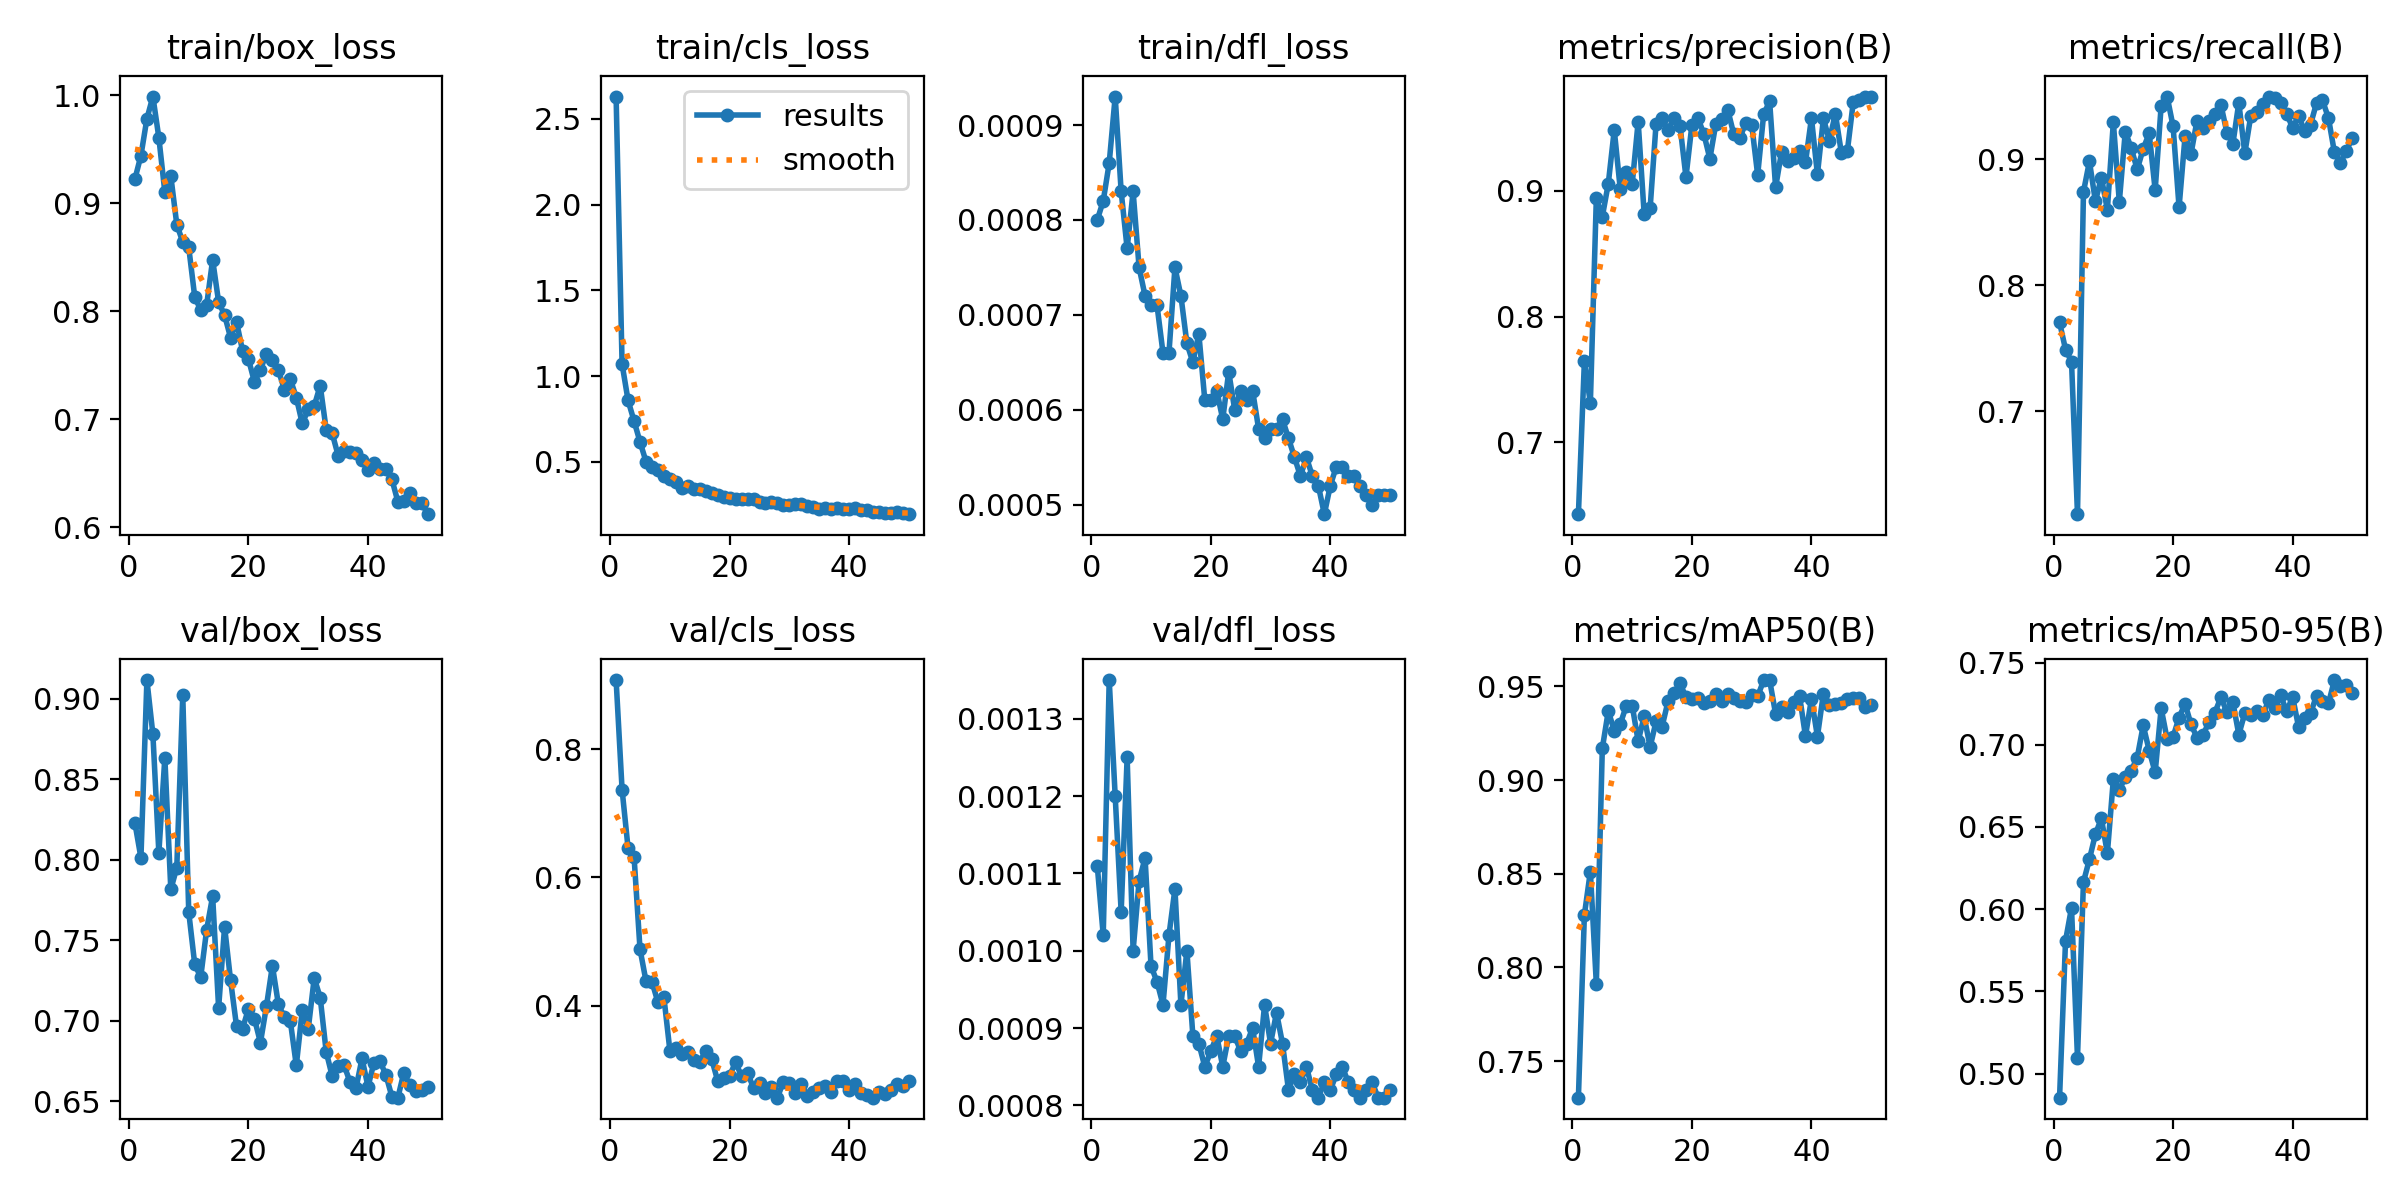

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{name}/results.png', width=600)

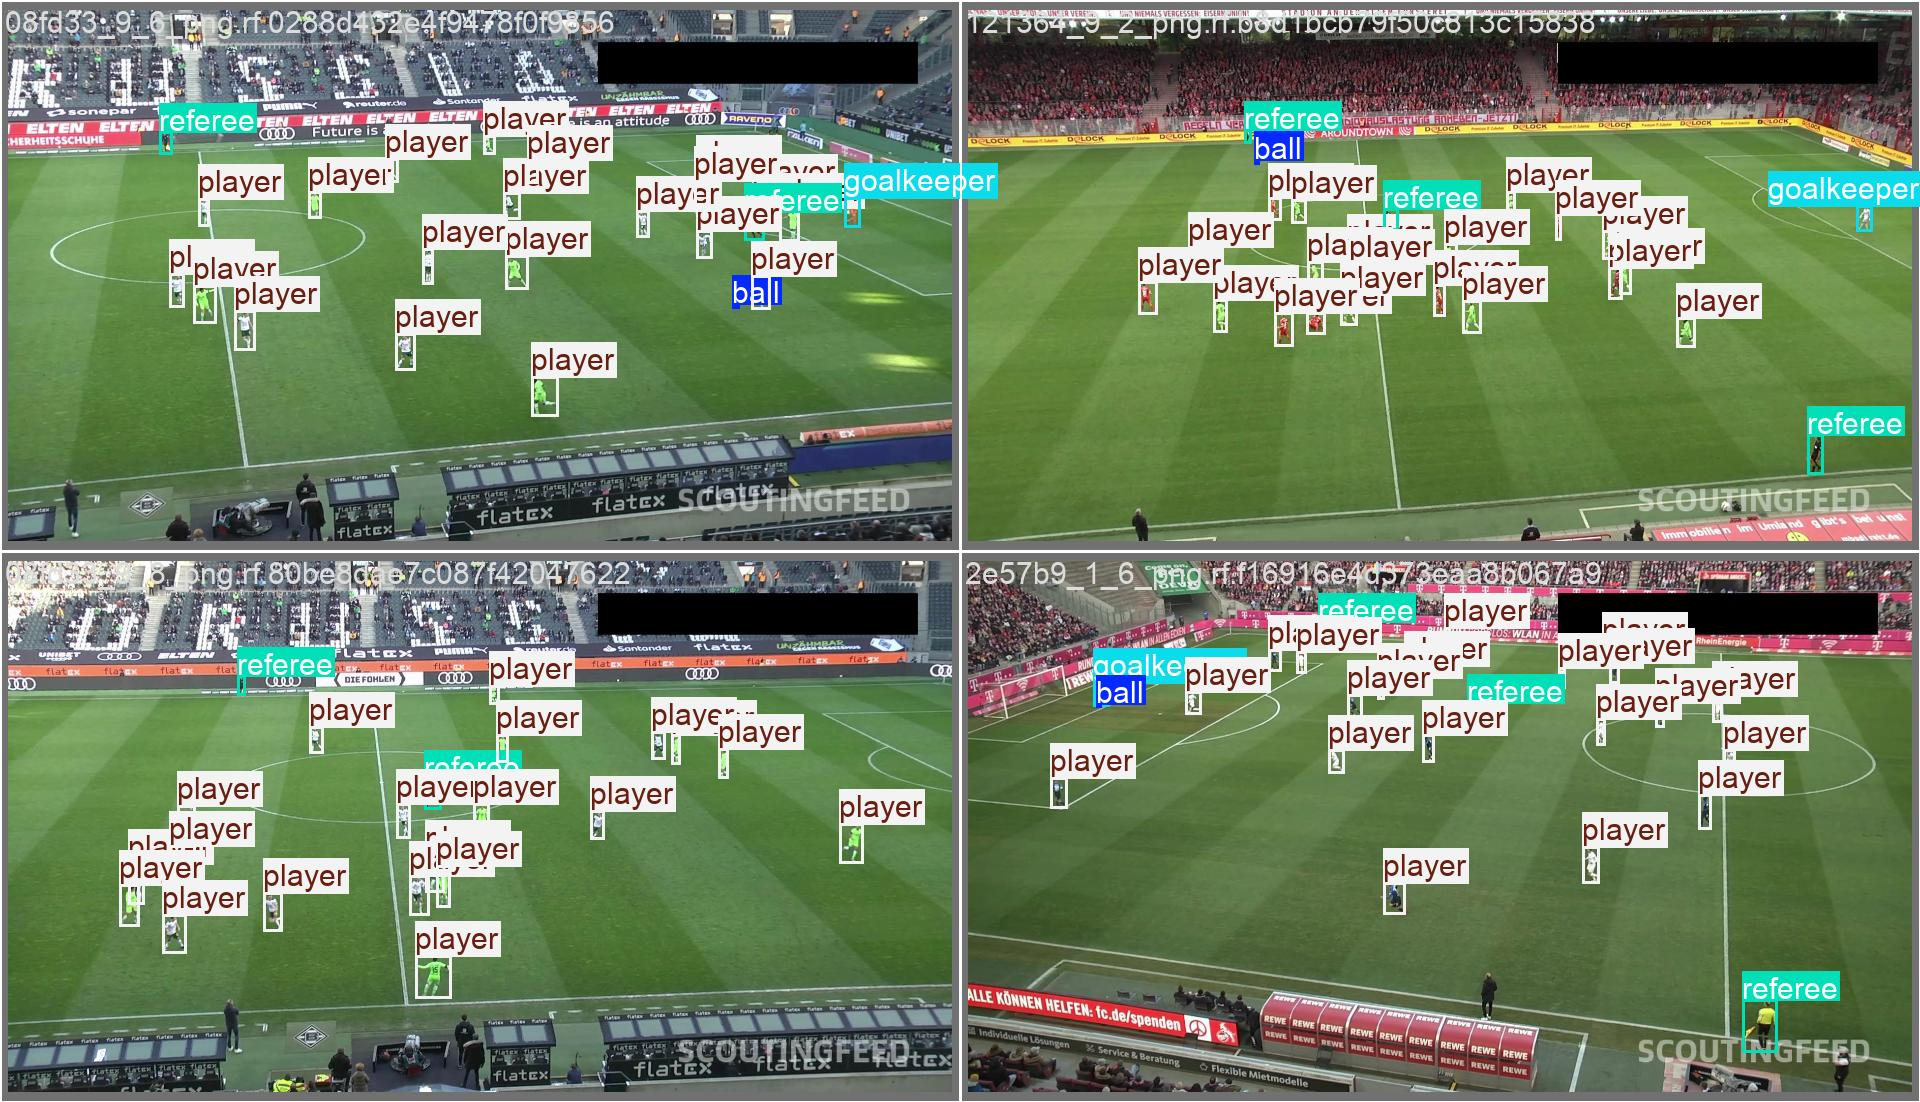

In [32]:
Image(filename=f'{HOME}/runs/detect/{name}/val_batch0_labels.jpg', width=600)

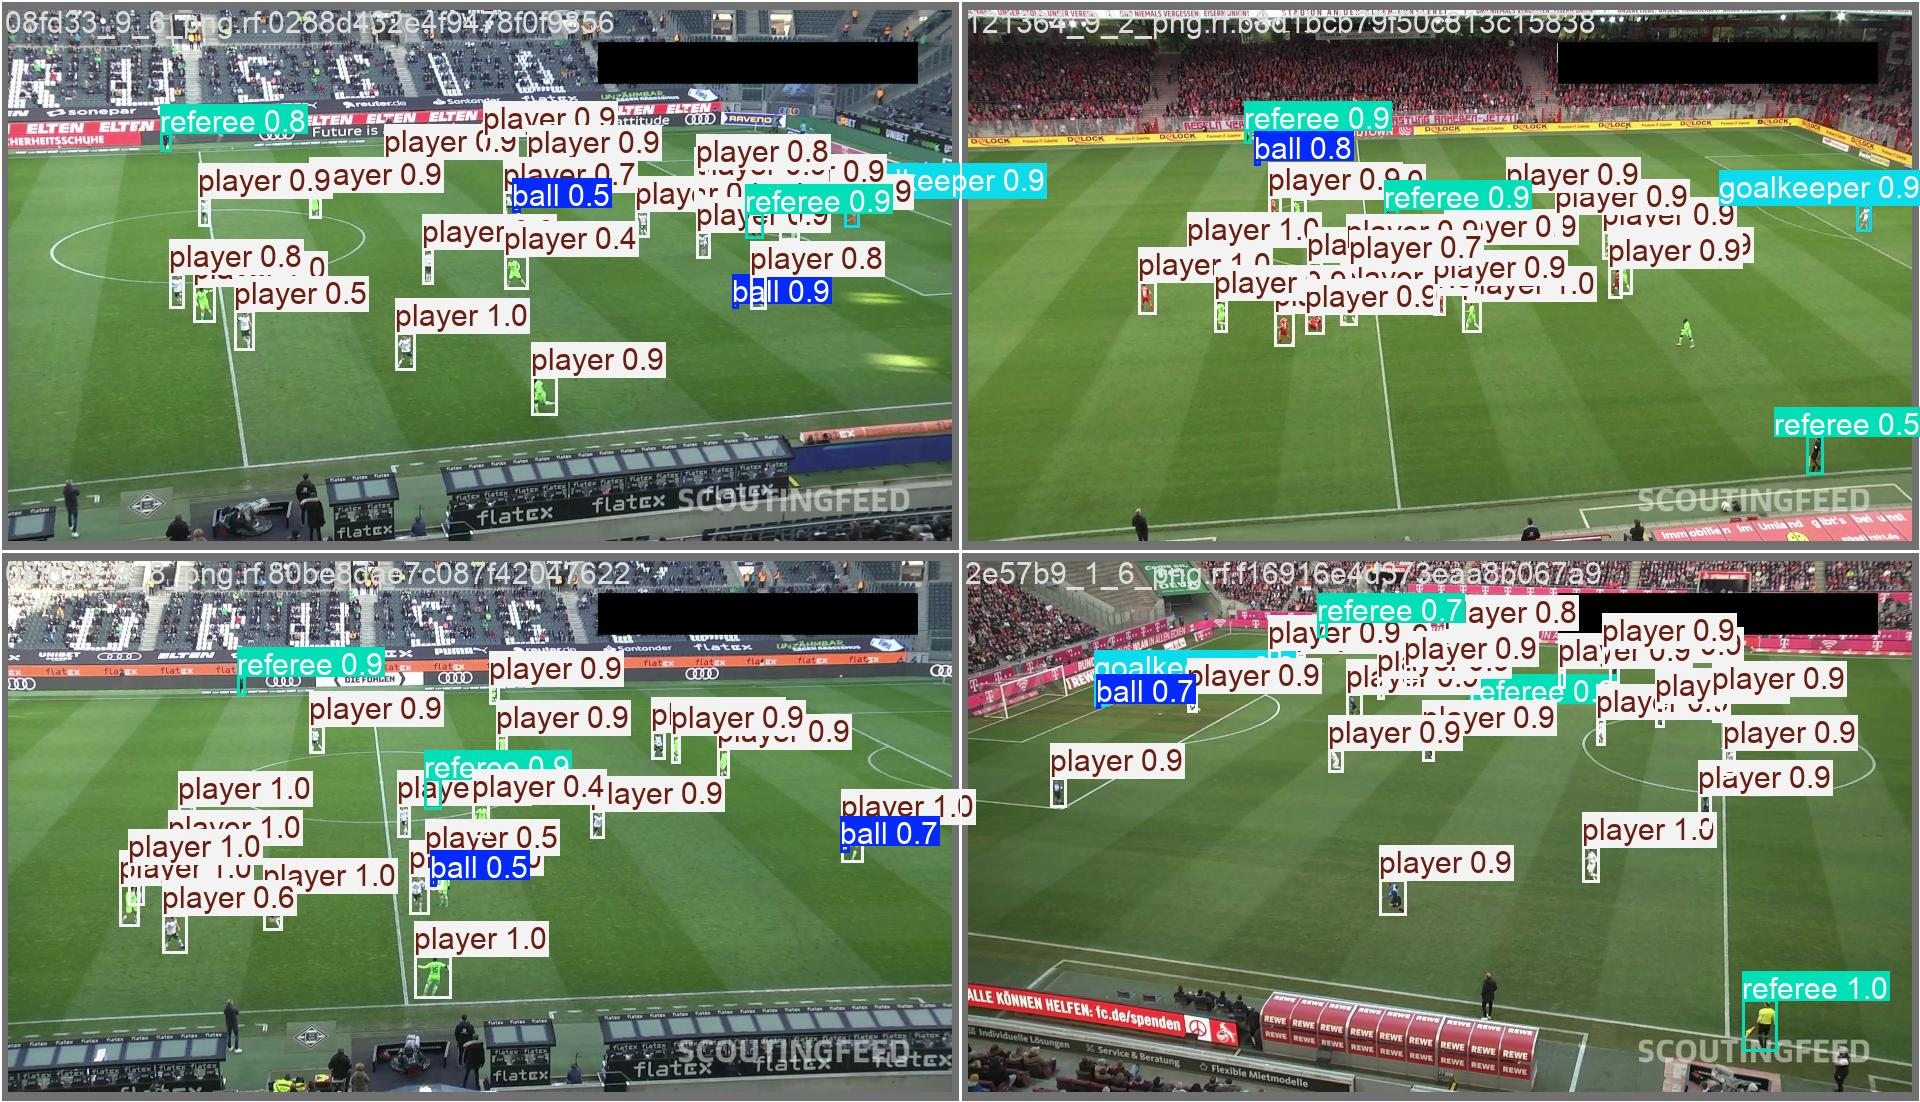

In [33]:
Image(filename=f'{HOME}/runs/detect/{name}/val_batch0_pred.jpg', width=600)

## Validate custom model

In [34]:
# !yolo val model={HOME}/runs/detect/{name}/weights/best.pt data={dataset.location}/data.yaml imgsz={IMAGE_SIZE} name={name+'_val'}